Nama : Filipus Arif Kristiyan

Nim : A11.2022.14278

Kelompok : A11.44UG1

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import VGG16
import seaborn as sns
import json
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# CNN



In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Pengaturan direktori dataset
train_dir = '/content/drive/MyDrive/ML Excercise /Excercise 8 Deep Learning/Dataset/train'
validation_dir = '/content/drive/MyDrive/ML Excercise /Excercise 8 Deep Learning/Dataset/test'

# Pengaturan ImageDataGenerator untuk augmentasi data
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Load dataset menggunakan flow_from_directory
batch_size = 10
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

# Definisikan model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(11, activation='softmax')  # Jumlah kelas = 10
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
epochs = 20
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

Found 100 images belonging to 11 classes.
Found 11 images belonging to 11 classes.
Epoch 1/20
10/10 [==============================] - 11s 909ms/step - loss: 2.7198 - accuracy: 0.1800 - val_loss: 2.1933 - val_accuracy: 0.1818
Epoch 2/20
10/10 [==============================] - 10s 912ms/step - loss: 2.0513 - accuracy: 0.2200 - val_loss: 1.7950 - val_accuracy: 0.4545
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 1.7053 - accuracy: 0.3700 - val_loss: 1.2906 - val_accuracy: 0.5455
Epoch 4/20
10/10 [==============================] - 8s 812ms/step - loss: 1.1442 - accuracy: 0.6100 - val_loss: 0.9273 - val_accuracy: 0.6364
Epoch 5/20
10/10 [==============================] - 10s 943ms/step - loss: 0.8116 - accuracy: 0.7200 - val_loss: 0.7407 - val_accuracy: 0.7273
Epoch 6/20
10/10 [==============================] - 11s 1s/step - loss: 0.6635 - accuracy: 0.7800 - val_loss: 0.5114 - val_accuracy: 0.7273
Epoch 7/20
10/10 [==============================] - 8s 822ms/step 

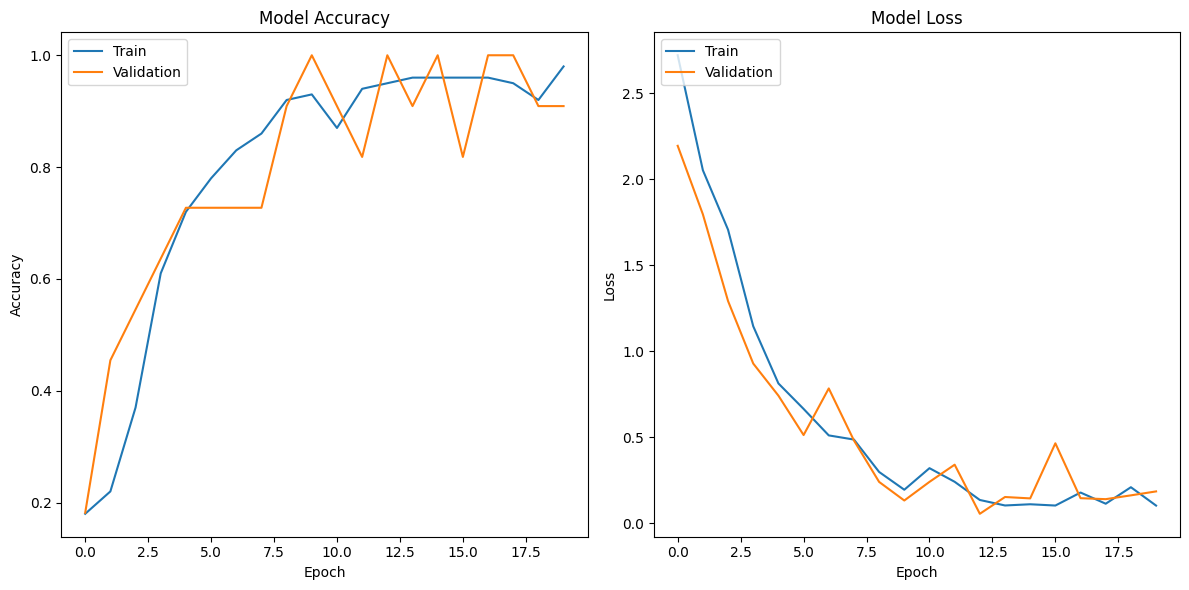

In [ ]:


# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Adjust layout to prevent overlap of titles and labels
plt.tight_layout()

# Show plot
plt.show()

# RNN

Found 88 images belonging to 11 classes.
Found 12 images belonging to 11 classes.
{'adi': 0, 'afif': 1, 'arif': 2, 'dany': 3, 'hanif': 4, 'irfan': 5, 'nathan': 6, 'naufal': 7, 'surya': 8, 'wahrul': 9, 'yudha': 10}
Epoch 1/20
5/5 [==============================] - 62s 12s/step - loss: 3.0246 - accuracy: 0.0972 - val_loss: 2.4940 - val_accuracy: 0.0833 - lr: 1.0000e-04
Epoch 2/20
5/5 [==============================] - 60s 14s/step - loss: 2.7177 - accuracy: 0.1667 - val_loss: 2.4983 - val_accuracy: 0.0833 - lr: 1.0000e-04
Epoch 3/20
5/5 [==============================] - 60s 12s/step - loss: 2.7823 - accuracy: 0.0972 - val_loss: 2.4894 - val_accuracy: 0.0833 - lr: 1.0000e-04
Epoch 4/20
5/5 [==============================] - 57s 11s/step - loss: 2.7263 - accuracy: 0.1389 - val_loss: 2.4828 - val_accuracy: 0.0833 - lr: 1.0000e-04
Epoch 5/20
5/5 [==============================] - 68s 14s/step - loss: 2.7817 - accuracy: 0.1375 - val_loss: 2.4632 - val_accuracy: 0.0833 - lr: 1.0000e-04
Epoch 

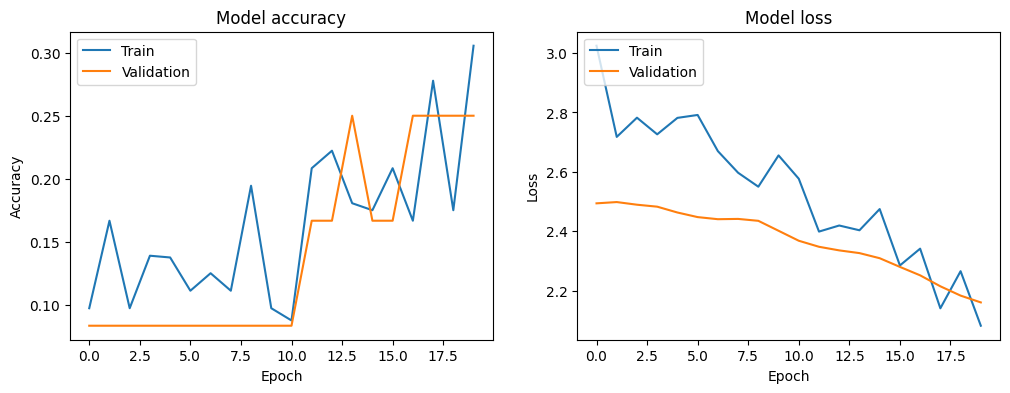

In [ ]:


# Set the path to your dataset
dataset_path = '/content/drive/MyDrive/ML Excercise /Excercise 8 Deep Learning/Dataset/train'

# Define parameters
img_height, img_width = 224, 224  # Adjusted size for VGG16
batch_size = 16

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data with augmentation
train_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_generator = validation_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Print class indices
print(train_generator.class_indices)

# Save the class indices to a file (optional)
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

# Ensure that steps_per_epoch and validation_steps are greater than 0
steps_per_epoch = max(train_generator.samples // batch_size, 1)
validation_steps = max(validation_generator.samples // batch_size, 1)

# Use a pre-trained VGG16 model for feature extraction
base_model = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,
                   weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Create a new model with SimpleRNN
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
    tf.keras.layers.SimpleRNN(128, return_sequences=True),
    tf.keras.layers.SimpleRNN(128),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# LSTM

Found 88 images belonging to 11 classes.
Found 12 images belonging to 11 classes.
{'adi': 0, 'afif': 1, 'arif': 2, 'dany': 3, 'hanif': 4, 'irfan': 5, 'nathan': 6, 'naufal': 7, 'surya': 8, 'wahrul': 9, 'yudha': 10}
Epoch 1/20
5/5 [==============================] - 62s 11s/step - loss: 2.7865 - accuracy: 0.0556 - val_loss: 2.3992 - val_accuracy: 0.0833 - lr: 1.0000e-04
Epoch 2/20
5/5 [==============================] - 58s 12s/step - loss: 2.5738 - accuracy: 0.1111 - val_loss: 2.3914 - val_accuracy: 0.0833 - lr: 1.0000e-04
Epoch 3/20
5/5 [==============================] - 54s 11s/step - loss: 2.4324 - accuracy: 0.1389 - val_loss: 2.3826 - val_accuracy: 0.1667 - lr: 1.0000e-04
Epoch 4/20
5/5 [==============================] - 59s 12s/step - loss: 2.5666 - accuracy: 0.1389 - val_loss: 2.3740 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 5/20
5/5 [==============================] - 55s 11s/step - loss: 2.2828 - accuracy: 0.2639 - val_loss: 2.3647 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 

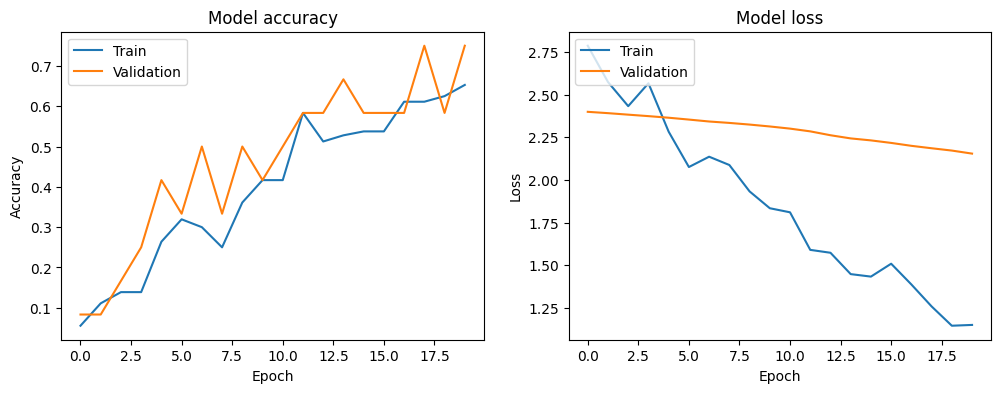

In [ ]:


# Set the path to dataset
dataset_path = '/content/drive/MyDrive/ML Excercise /Excercise 8 Deep Learning/Dataset/train'

# Define parameters
img_height, img_width = 224, 224  # Adjusted size for VGG16
batch_size = 16

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data with augmentation
train_generator = train_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Load validation data without augmentation
validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
validation_generator = validation_datagen.flow_from_directory(
    directory=dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Print class indices
print(train_generator.class_indices)

# Save the class indices to a file (optional)
with open('class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)

# Ensure that steps_per_epoch and validation_steps are greater than 0
steps_per_epoch = max(train_generator.samples // batch_size, 1)
validation_steps = max(validation_generator.samples // batch_size, 1)

# Use a pre-trained VGG16 model for feature extraction
base_model = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,
                   weights='imagenet')
base_model.trainable = False  # Freeze the base model

# Create a new model with LSTM
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=20,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##PERBANDINGAN

##Performa Model CNN

Training Accuracy : 98%

Validation Accuracy : 90,91%


##Performa Model RNN  

Training Accuracy : 30,56%

Validation Accuracy : 25%


##Model LSTM :

Training Accuracy : 65,28%

Validation Accuracy : 75%

Performa Terbaik: CNN